In [54]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [55]:
def read_data(filename):
    times, positions, velocities = [], [], []
    with open(filename, 'r') as file:
        for line in file:
          line = line.strip()
          if line:
              time_str = line[:line.find(" ")]
              time = float(time_str)

              pos_start = line.find("(") + 1
              pos_end = line.find(")", pos_start)
              position_str = line[pos_start:pos_end]
              position = tuple(map(float, position_str.split(',')))

              vel_start = line.find("(", pos_end) + 1
              vel_end = line.find(")", vel_start)
              velocity_str = line[vel_start:vel_end]
              velocity = tuple(map(float, velocity_str.split(',')))

              times.append(time)
              positions.append(position)
              velocities.append(velocity)

    times = np.array(times)
    positions = np.array(positions)
    velocities = np.array(velocities)
    return times, positions, velocities

def kinetic_energy(velocities, mass):
    speeds_squared = np.sum(velocities**2, axis=1)
    return 0.5 * mass * speeds_squared

In [75]:
def writer_trajectory(filename):
  mass = 1.0

  times, positions, velocities = read_data(filename)

  kinetic_energies = kinetic_energy(velocities, mass)

  fig = plt.figure(figsize=(12, 10))

  ax1 = fig.add_subplot(221, projection='3d')
  ax1.plot(positions[:, 0], positions[:, 1], positions[:, 2], label="Trajectory")
  ax1.set_xlabel('X')
  ax1.set_ylabel('Y')
  ax1.set_zlabel('Z')
  ax1.set_title("3D Trajectory")
  ax1.legend()
  

  ax2 = fig.add_subplot(222)
  ax2.plot(positions[:, 0], positions[:, 1], color = 'g')
  ax2.set_xlabel('X')
  ax2.set_ylabel('Y')
  ax2.set_title("XY Plane")


  ax3 = fig.add_subplot(223)
  ax3.plot(positions[:, 0], positions[:, 2], color = 'r')
  ax3.set_xlabel('X')
  ax3.set_ylabel('Z')
  ax3.set_title("XZ Plane")
  ax3.set_aspect('equal')


  ax4 = fig.add_subplot(224)
  ax4.plot(positions[:, 1], positions[:, 2], color = 'b')
  ax4.set_xlabel('Y')
  ax4.set_ylabel('Z')
  ax4.set_title("YZ Plane")



  plt.figure()
  plt.plot(times, kinetic_energies, label="Kinetic Energy")
  plt.xlabel("Time")
  plt.ylabel("Kinetic Energy")
  plt.title("Kinetic Energy Over Time")
  # plt.ylim(0.0075, 0.0125) 
  plt.legend()
  # изменить масштаб по y

  plt.show()


In [57]:
def writer_spectrum(filename):
    frequencies = []
    spectrum_values = []

    with open(filename, 'r') as file:
        for line in file:
            parts = line.split()
            frequency = float(parts[0])
            spectrum_value = float(parts[1])
            
            frequencies.append(frequency)
            spectrum_values.append(spectrum_value)

    frequencies = np.array(frequencies)
    spectrum_values = np.array(spectrum_values)
    
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, spectrum_values, linestyle='-', color='b')

    plt.title("Зависимость спектра от частоты")
    plt.grid(True)

    plt.show()  

In [58]:
def writer_color_map(filename, w_max):
    color_map = np.loadtxt(filename)

    num_w = color_map.shape[1]
    num_theta = color_map.shape[0]
    w = np.linspace(0.1, w_max, num_w)  # Диапазон радиуса от 0.1 до max_w
    theta = np.linspace(0, 2 * np.pi, num_theta) 

    W, Theta = np.meshgrid(w, theta)

    color_map_log = np.log10(color_map)

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 6))
    contour = ax.contourf(Theta, W, color_map_log, levels=20, cmap="viridis") 

    cbar = fig.colorbar(contour, ax=ax, label="Logarithmic Intensity")
    cbar.set_label("Intensity (log scale)")

    plt.show()

#Осциллирующее поле

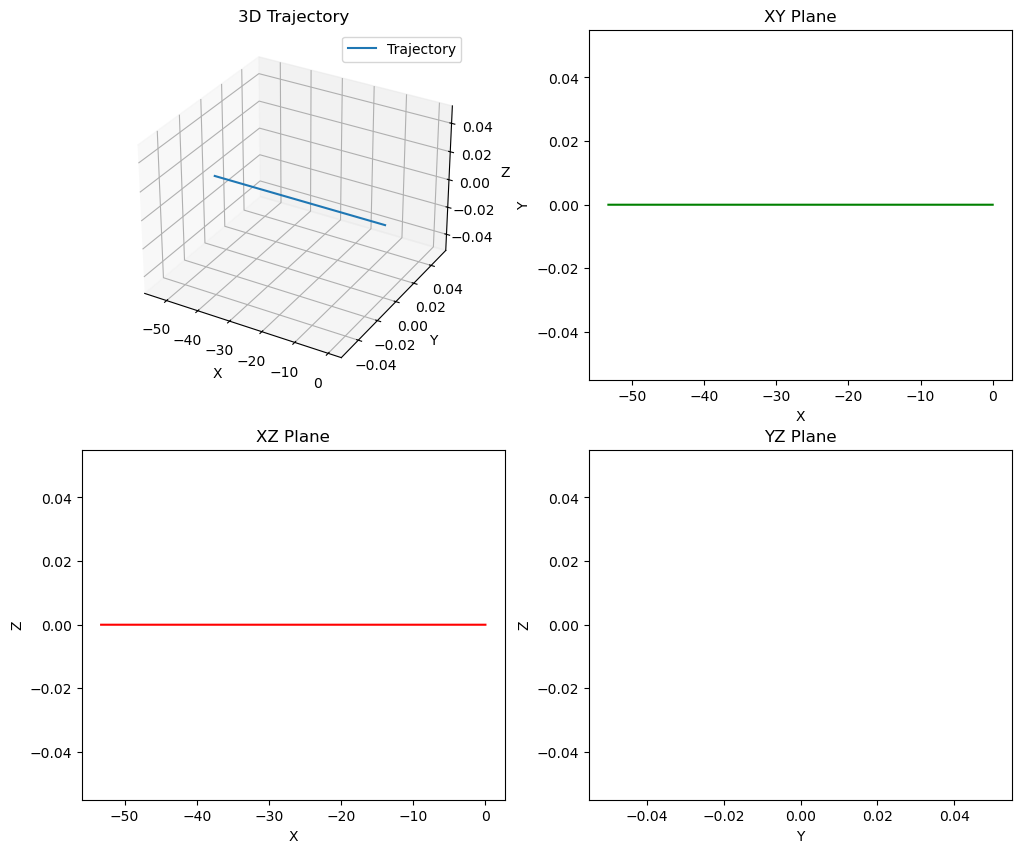

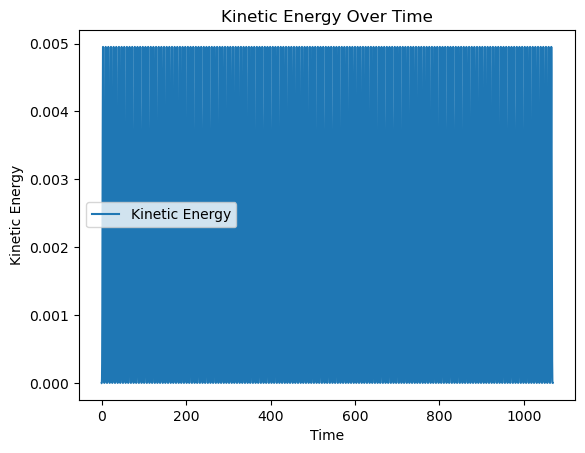

In [59]:
filename = "C:\\Users\\Антон\\Desktop\\МИФИ\\4 курс\\My_project\\build\\data_particles_oscillatingEMField.txt"
writer_trajectory(filename)

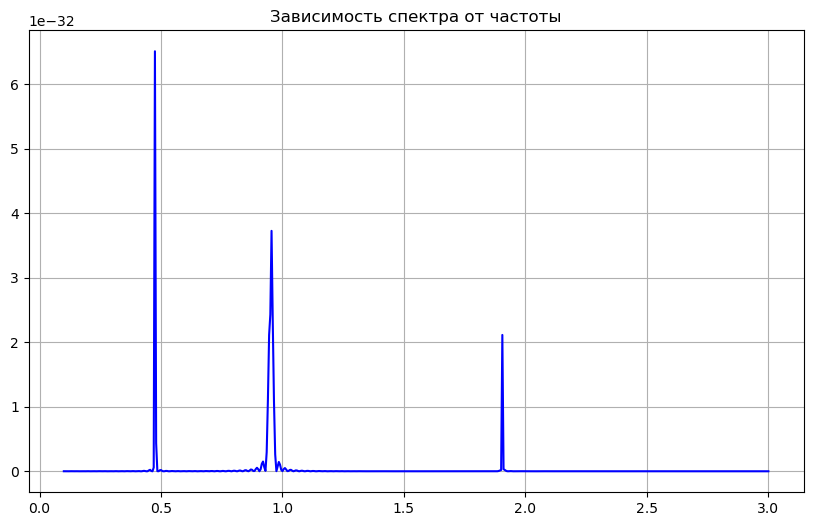

In [60]:
filename = 'C:\\Users\\Антон\\Desktop\\МИФИ\\4 курс\\My_project\\build\\radiation_spectrum_oscillatingEMField.txt'
writer_spectrum(filename)


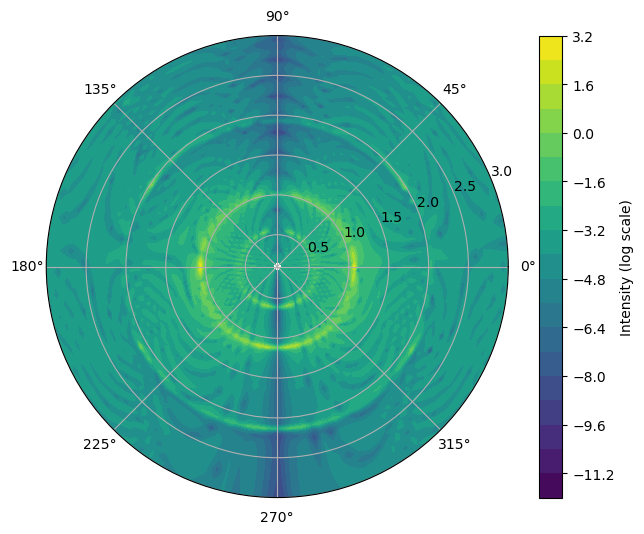

In [61]:
filename = 'C:\\Users\\Антон\\Desktop\\МИФИ\\4 курс\\My_project\\build\\color_map_oscillatingEMField.txt'
writer_color_map(filename, 3.0)

#Перекрестное поле

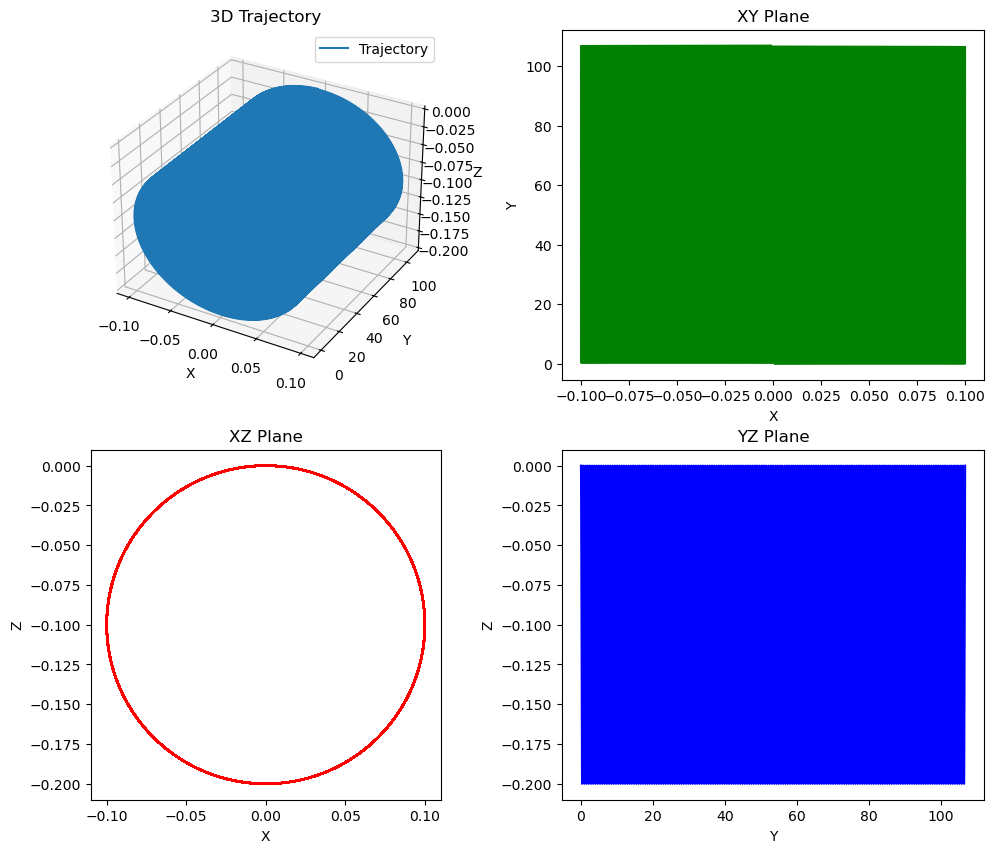

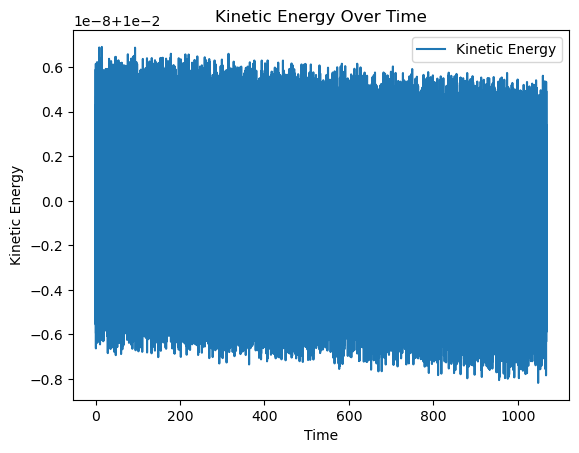

In [76]:
filename = "C:\\Users\\Антон\\Desktop\\МИФИ\\4 курс\\My_project\\build\\data_particles_crossEMField.txt"
writer_trajectory(filename)

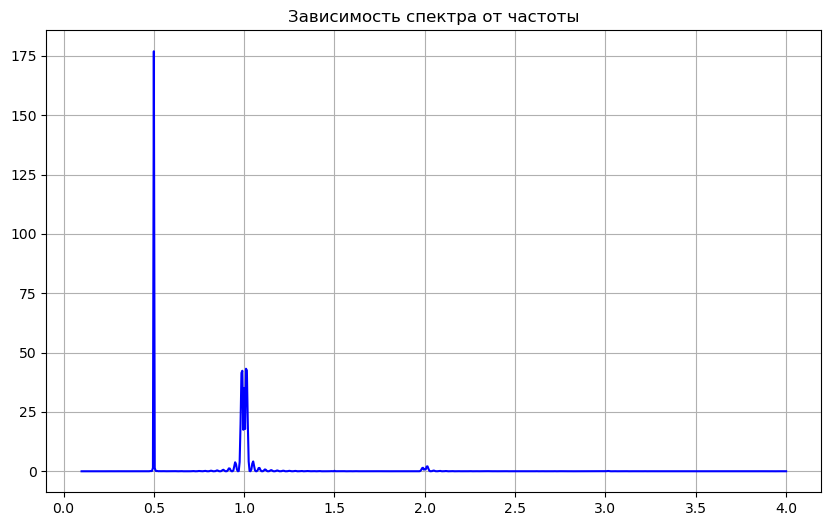

In [66]:
filename = 'C:\\Users\\Антон\\Desktop\\МИФИ\\4 курс\\My_project\\build\\radiation_spectrum_crossEMField.txt'
writer_spectrum(filename)


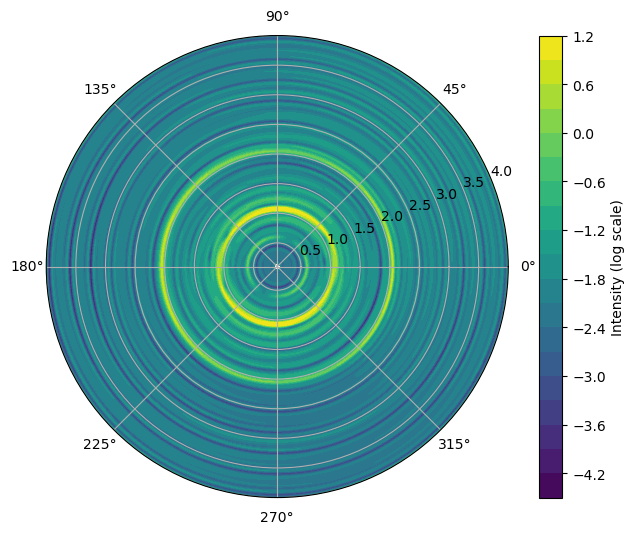

In [78]:
filename = 'C:\\Users\\Антон\\Desktop\\МИФИ\\4 курс\\My_project\\build\\color_map_crossEMField.txt'
writer_color_map(filename, 4)